### Introduction
This notebook shows how to implement Andrew Ng's neural net that emulates an XNOR gate. The implementation is done using Tensorflow. Care has been taken to make this implementation efficient, by using vector arithmetic whereever possible.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [9]:
# Helper functions

def PlotValues(span, vals):
    """Plots given 2d array of values that cover a grid span x span."""
    fig = plt.figure(figsize=(10, 8))
    xv, yv = np.meshgrid(span, span)
    ax = fig.gca(projection='3d')
    cset = ax.contourf(xv, yv, vals, zdir='z', offset=span.min() - 0.3, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='x', offset=span.min() - 0.1, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='y', offset=span.max() + 0.1, cmap=cm.coolwarm)
    ax.plot_surface(xv, yv, vals, cmap=cm.coolwarm)

    ax.set_xlabel('x1')
    ax.set_xlim(span.min() - 0.1, span.max())
    ax.set_ylabel('y1')
    ax.set_ylim(span.min(), span.max() + 0.1)
    ax.set_zlabel('h')
    ax.set_zlim(span.min() - 0.3, span.max() + 0.1)

    plt.show()
    
def ComputeValsFast(h, span):
    """Computes values of h for points from span x span grid."""
    x1, x2 = np.meshgrid(span, span)
    X_in = np.column_stack([x1.flatten(), x2.flatten()])
    with tf.Session() as sess:
        return np.reshape(sess.run(h, feed_dict={X: X_in}), x1.shape)

In [10]:
# Model a 2 + 1 neural net emulating XNOR gate.

X = tf.placeholder(tf.float32, [None, 2], name="X")
W1 = tf.constant([[20.0, -20.0], [20.0, -20.0]], name="W1")
b1 = tf.constant([-30, 10.0], name="b1")
and_nor = tf.sigmoid(tf.add(tf.matmul(X, W1), b1))
W2 = tf.constant([[20.0], [20.0]], name="W2")
b2 = tf.constant([-10.0], name="b1")
h_xnor_fast = tf.sigmoid(tf.add(tf.matmul(and_nor, W2), b2))

In [11]:
%%timeit -n10
ComputeValsFast(h_xnor_fast, np.linspace(0, 1, 100))

10 loops, best of 3: 9.96 ms per loop


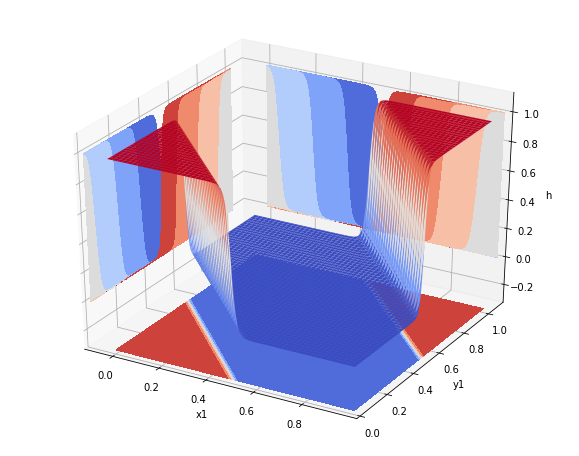

In [12]:
span_large = np.linspace(0, 1, 1000)
xnor_vals_dense = ComputeValsFast(h_xnor_fast, span_large)
PlotValues(span_large, xnor_vals_dense)